In [2]:
import afm_csv_analysis as afm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [8]:
cut_path = r"C:\Users\poeda\OneDrive\Desktop\Documents\Luo Group\AFM Images\Cutting Interface\tiny_cuts.csv"
cut = afm.afmData(cut_path)
tiny_cuts = cut.select_profiles([1]).zero_minimums()
thickness = cut.select_profiles([2]).zero_minimums()
tiny_cuts.plotly_graph()
#thickness.plotly_graph()

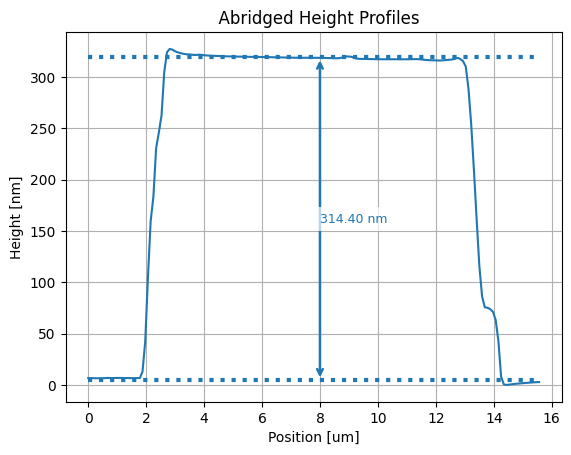

In [7]:
plat1 = thickness.data[
    ((thickness.data['position2'] >= 0) & (thickness.data['position2'] <= 1680e-9)) |
    ((thickness.data['position2'] >= 14400e-9) & (thickness.data['position2'] <= 15500e-9))
]
plat2 = thickness.data[
    (thickness.data['position2'] >= 2800e-9) & (thickness.data['position2'] <= 12700e-9)]
plat1_height = plat1['height2'].mean()
plat2_height = plat2['height2'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position2'].max())
place = 8000e-9

thickness.steps = {}
thickness.steps['Profile 2'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


thickness.graph(show_steps=True, legend=False)

     position1       height1
23    0.000002  6.259746e-08
106   0.000010  6.249598e-08
142   0.000013  5.602777e-08
154   0.000014  6.075740e-08
168   0.000016  6.606751e-08


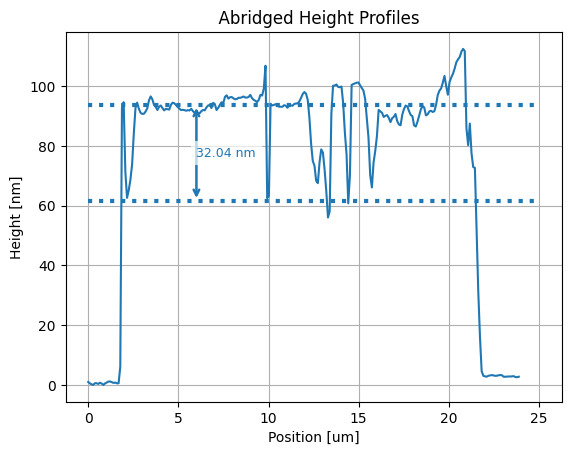

In [14]:
targets = [
    2.153347e-6,
    9.92412e-6,
    13.29457e-6,
    14.41806e-6,
    15.72879e-6
]

idxs = [
    (tiny_cuts.data['position1'] - t).abs().idxmin()
    for t in targets
]

plat1 = tiny_cuts.data.loc[idxs]
print(plat1)
plat2 = tiny_cuts.data[
    (tiny_cuts.data['position1'] >= 2700e-9) & (tiny_cuts.data['position1'] <= 9300e-9)]
plat1_height = plat1['height1'].mean()
plat2_height = plat2['height1'].mean()
height = plat2_height - plat1_height
range = (0, 25e-6)
place = 6000e-9

tiny_cuts.steps = {}
tiny_cuts.steps['Profile 1'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


tiny_cuts.graph(show_steps=True, legend=False)

In [15]:
device_path = r"C:\Users\poeda\OneDrive\Desktop\Documents\Luo Group\AFM Images\CrsBr MTJ Project\Device 15\crsbr_height.csv"
device = afm.afmData(device_path).zero_minimums()
device.plotly_graph()


In [18]:
plat1 = device.data[
    ((device.data['position1'] >= 0) & (device.data['position1'] <= 530e-9)) |
    ((device.data['position1'] >= 2800e-9) & (device.data['position1'] <= 2900e-9))
]
plat2 = device.data[
    (device.data['position1'] >= 800e-9) & (device.data['position1'] <= 2600e-9)]
plat1_height = plat1['height1'].mean()
plat2_height = plat2['height1'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position1'].max())
place = 2000e-9

device.steps = {}
device.steps['Profile 1'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


In [19]:
plat1 = device.data[
    ((device.data['position2'] >= 0) & (device.data['position2'] <= 550e-9)) |
    ((device.data['position2'] >= 2700e-9) & (device.data['position2'] <= 2900e-9))
]
plat2 = device.data[
    (device.data['position2'] >= 650e-9) & (device.data['position2'] <= 1800e-9)]
plat1_height = plat1['height2'].mean()
plat2_height = plat2['height2'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position2'].max())
place = 1250e-9

device.steps['Profile 2'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


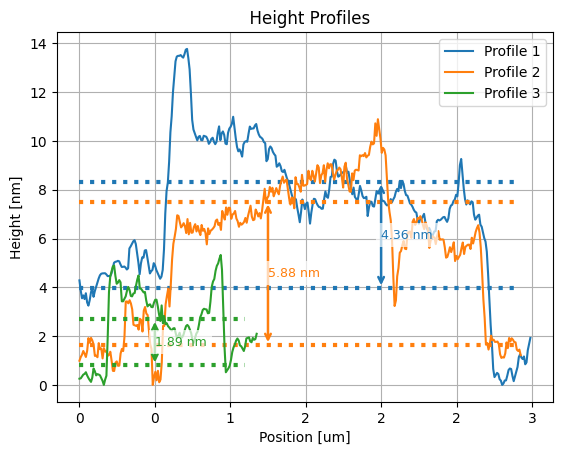

In [20]:
plat1 = device.data[
    ((device.data['position3'] >= 0) & (device.data['position3'] <= 160e-9)) |
    ((device.data['position3'] >= 970e-9) & (device.data['position3'] <= 1100e-9))
]
plat2 = device.data[
    (device.data['position3'] >= 20e-9) & (device.data['position3'] <= 920e-9)]
plat1_height = plat1['height3'].mean()
plat2_height = plat2['height3'].mean()
height = plat2_height - plat1_height
range = (0, plat1['position3'].max())
place = 500e-9

device.steps['Profile 3'] = {
    "step_height": height,
    "x_step": place,
    "plateau1_mean": plat1_height, 
    "plateau2_mean": plat2_height,
    "plateau1_range": range,
    "plateau2_range": range}


device.graph(show_steps=True, legend=True)

Text(0, 0.5, 'Cut Thickness [nm]')

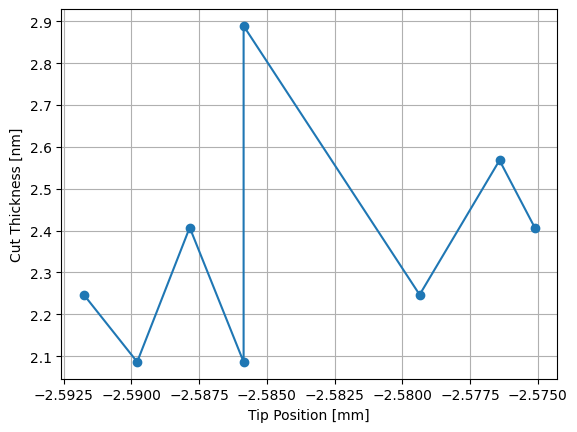

In [ ]:
cut_height = [-2.59176,-2.58979,-2.58785,-2.58586,-2.58586,-2.57936,-2.57641,-2.57511]
cut_thickness = [2.246902,2.086409,2.407395,2.086409,2.888874,2.246902,2.567888,2.407395]
plt.plot(cut_height, cut_thickness, 'o-')
plt.grid()
plt.xlabel('Tip Position [mm]')
plt.ylabel('Cut Thickness [nm]')
plt